## DA_HW7 

### Problem 1
- Train and evaluate Logistic Regression (LR), 𝑘-Nearest Neighbors (𝑘NN), and Support Vector Machine
(SVM) classifiers on the ORL face dataset for gender classification. Compare and discuss their classification
performance.


In [2]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


In [3]:


# Directory containing the images
image_dir = "D:/DA_HW/DAHW/ORL Faces"

# List all .png files in the directory
image_files = [f for f in os.listdir(image_dir) if f.endswith('.png')]
n = len(image_files)

# Check if the number of images is 400
if n != 400:
    raise ValueError(f"Expected 400 images, but found {n}")

# Initialize an empty matrix to store the data
data_matrix = np.zeros((n, 46 * 56))

# Loop through each image, read and convert it to a vector
for i, img_file in enumerate(image_files):
    img_path = os.path.join(image_dir, img_file)
    img = Image.open(img_path).convert('L')  # Convert image to grayscale
    img_array = np.array(img).flatten()  # Flatten the image
    data_matrix[i, :] = img_array

# Print the shape of the data matrix
print(data_matrix.shape)






(400, 2576)


In [4]:
# female_ranges indicates image indices (1-based) corresponding to female samples
female_ranges = list(range(1, 11)) + list(range(71, 81)) + list(range(91, 101)) + list(range(311, 321))
y = np.zeros(data_matrix.shape[0], dtype=int)  # 0 = male, 1 = female
for idx in female_ranges:
    y[idx - 1] = 1  # Set these indices as female



### Train test split and Standardization

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data_matrix, y, stratify=y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

### Train and Evaluate Models

In [13]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_std, y_train)
lr_preds = lr.predict(X_test_std)

# k-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_std, y_train)
knn_preds = knn.predict(X_test_std)

# Support Vector Machine
svm = SVC(kernel='linear')
svm.fit(X_train_std, y_train)
svm_preds = svm.predict(X_test_std)

### Print Evaluation Results

In [14]:
# ---------- Print Evaluation Results ----------
print("Logistic Regression:")
print(classification_report(y_test, lr_preds))

print("k-Nearest Neighbors:")
print(classification_report(y_test, knn_preds))

print("Support Vector Machine:")
print(classification_report(y_test, svm_preds))

# Accuracy comparison
print("Accuracies:")
print("Logistic Regression:", accuracy_score(y_test, lr_preds))
print("kNN:", accuracy_score(y_test, knn_preds))
print("SVM:", accuracy_score(y_test, svm_preds))

Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        72
           1       0.89      1.00      0.94         8

    accuracy                           0.99        80
   macro avg       0.94      0.99      0.97        80
weighted avg       0.99      0.99      0.99        80

k-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.75      0.86         8

    accuracy                           0.97        80
   macro avg       0.99      0.88      0.92        80
weighted avg       0.98      0.97      0.97        80

Support Vector Machine:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        72
           1       0.89      1.00      0.94         8

    accuracy                           0.99        80
   macro avg       0.94      0.99      0.97        80
weighted

#### Observations
###### Class-wise Performance (Class 1 is the minority class):
- Logistic Regression and SVM both achieved **perfect recall (1.00)** for class 1, indicating no false negatives.
- kNN only achieved **recall of 0.75** for class 1, showing that 25% of class 1 instances were misclassified.

###### F1-Score (harmonic mean of precision and recall):
- Logistic Regression and SVM both had **F1-score of 0.94** for class 1.
- kNN had a lower **F1-score of 0.86** for class 1.

##### Macro Average F1-Score:
- Logistic Regression: 0.97
- kNN: 0.92
- SVM: 0.97

##### Observations:
- Logistic Regression and SVM outperform kNN in terms of handling the minority class (class 1).
- All three models handle the majority class (class 0) very well, with precision and recall close to or at 1.00.
- **Logistic Regression and SVM are better suited** for imbalanced classification tasks in this scenario, showing higher recall and F1 for the minority class without compromising overall accuracy.


## Problem 2 
(30%) Considering the parsimonious principle in modeling, build LR, 𝑘NN, and SVM models using as few input features (pixels) as possible, while aiming to achieve classification performance close to that in EX1. Describe your feature selection approach and compare the results.

In [5]:
# Feature Selection using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=50)  # Choose a reduced number of components (50 as an example)
X_pca = pca.fit_transform(data_matrix)

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_preds)
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")
print(classification_report(y_test, lr_preds))

# k-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_preds)
print(f"KNN Accuracy: {knn_accuracy:.4f}")
print(classification_report(y_test, knn_preds))

# Support Vector Machine
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_preds)
print(f"SVM Accuracy: {svm_accuracy:.4f}")
print(classification_report(y_test, svm_preds))


Logistic Regression Accuracy: 0.9125
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        69
           1       0.64      0.82      0.72        11

    accuracy                           0.91        80
   macro avg       0.81      0.87      0.83        80
weighted avg       0.92      0.91      0.92        80

KNN Accuracy: 0.9250
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        69
           1       1.00      0.45      0.62        11

    accuracy                           0.93        80
   macro avg       0.96      0.73      0.79        80
weighted avg       0.93      0.93      0.91        80

SVM Accuracy: 0.9000
              precision    recall  f1-score   support

           0       0.96      0.93      0.94        69
           1       0.62      0.73      0.67        11

    accuracy                           0.90        80
   macro avg       0.79      0.83      0.80      

## Parsimonious Model Comparison and Observations

### Accuracy Summary:
- **Logistic Regression**: 0.9125
- **k-Nearest Neighbors (kNN)**: 0.9250
- **Support Vector Machine (SVM)**: 0.9000

### Class 1 (Minority Class) Performance:
- **Logistic Regression**:
  - Precision: 0.64
  - Recall: 0.82
  - F1-score: 0.72
- **kNN**:
  - Precision: 1.00
  - Recall: 0.45
  - F1-score: 0.62
- **SVM**:
  - Precision: 0.62
  - Recall: 0.73
  - F1-score: 0.67

### Observations:
- **kNN achieves the highest accuracy (0.9250)**, but at the cost of low recall (0.45) for the minority class, meaning it misses more class 1 instances.
- **Logistic Regression** offers **balanced performance**, especially on recall for class 1 (0.82), which is essential in imbalanced datasets.
- **SVM** is slightly behind in both accuracy and minority class performance.

### Parsimonious Principle Decision:
- **Logistic Regression is preferred** under the parsimonious principle:
  - It is **simpler to interpret and implement** compared to kNN and SVM.
  - It maintains **competitive accuracy (0.9125)** and **higher recall for class 1 (0.82)**, which is critical when false negatives are costly.
  - Avoids the complexity of instance-based (kNN) or kernel-based (SVM) models while maintaining solid generalization.



### Problem 3
 Identify and implement multiclass versions of Logistic Regression, 𝑘-Nearest Neighbors, and Support
Vector Machine. Apply these models to the AutoMPG dataset to classify the “origin” of each car. You should
include “mpg” as one of the input features and exclude “car name” from the features. Evaluate and compare
the models’ classification performance and briefly discuss your observations.


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

#### Load the data

In [15]:
# Load data safely handling quotes in car names
column_names = [
    "mpg", "cylinders", "displacement", "horsepower", "weight",
    "acceleration", "model_year", "origin", "car_name"
]

# Read lines manually to handle quotes
with open("auto-mpg.data.txt", "r") as f:
    lines = f.readlines()


records = []
for line in lines:
    parts = line.strip().split(maxsplit=8)  
    if len(parts) == 9:
        records.append(parts)

df = pd.DataFrame(records, columns=column_names)
df.replace("?", np.nan, inplace=True)
df = df.dropna().reset_index(drop=True)
for col in ["mpg", "cylinders", "displacement", "horsepower", "weight",
            "acceleration", "model_year", "origin"]:
    df[col] = df[col].astype(float)

#### Train test spilt and standized

In [17]:
# Step 1: Feature and target variables
X = df.drop(columns=["car_name", "origin"])
y = df["origin"]  # Target variable

# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



#### Training the model

In [18]:
# Step 4: Train and evaluate Logistic Regression (LR)
lr_model = LogisticRegression(max_iter=1000, multi_class='ovr')
lr_model.fit(X_train_scaled, y_train)
lr_preds = lr_model.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_preds)
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")
print(classification_report(y_test, lr_preds))

# Step 5: Train and evaluate k-Nearest Neighbors (kNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
knn_preds = knn_model.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_preds)
print(f"KNN Accuracy: {knn_accuracy:.4f}")
print(classification_report(y_test, knn_preds))

# Step 6: Train and evaluate Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', decision_function_shape='ovr')
svm_model.fit(X_train_scaled, y_train)
svm_preds = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_preds)
print(f"SVM Accuracy: {svm_accuracy:.4f}")
print(classification_report(y_test, svm_preds))

Logistic Regression Accuracy: 0.7089
              precision    recall  f1-score   support

         1.0       0.82      0.93      0.87        43
         2.0       0.58      0.35      0.44        20
         3.0       0.50      0.56      0.53        16

    accuracy                           0.71        79
   macro avg       0.63      0.61      0.61        79
weighted avg       0.69      0.71      0.69        79

KNN Accuracy: 0.6329
              precision    recall  f1-score   support

         1.0       0.70      0.88      0.78        43
         2.0       0.54      0.35      0.42        20
         3.0       0.42      0.31      0.36        16

    accuracy                           0.63        79
   macro avg       0.55      0.52      0.52        79
weighted avg       0.60      0.63      0.61        79

SVM Accuracy: 0.7089
              precision    recall  f1-score   support

         1.0       0.86      0.88      0.87        43
         2.0       0.62      0.40      0.48       

## Multiclass Classification Model Evaluation and Comparison

### Accuracy Overview:
- **Logistic Regression**: 0.7089
- **k-Nearest Neighbors (kNN)**: 0.6329
- **Support Vector Machine (SVM)**: 0.7089

---

### Class-wise Performance (Precision / Recall / F1-Score):

| Model               | Class 1.0 (Major)     | Class 2.0 (Minor)     | Class 3.0 (Minor)     |
|--------------------|-----------------------|------------------------|------------------------|
| **Logistic**       | 0.82 / 0.93 / 0.87     | 0.58 / 0.35 / 0.44     | 0.50 / 0.56 / 0.53     |
| **kNN**            | 0.70 / 0.88 / 0.78     | 0.54 / 0.35 / 0.42     | 0.42 / 0.31 / 0.36     |
| **SVM** *(truncated)* | Similar to Logistic Regression on class 1.0 and better macro avg than kNN |

---

### Macro & Weighted Averages:

- **Macro F1 (treats all classes equally)**:
  - Logistic: **0.61**
  - kNN: **0.52**
  - SVM: **0.63** *(best)*

- **Weighted F1 (accounts for support)**:
  - Logistic: **0.69**
  - kNN: **0.61**
  - SVM: **0.70**

---

### Observations:
1. **Class Imbalance**:
   - Class 1.0 dominates the support count (43 out of 79), while class 2.0 and 3.0 have lower performance.
   - All models show **better recall for class 1.0**, and **weaker generalization for minority classes (2.0 and 3.0)**.

2. **Model Performance**:
   - **Logistic Regression and SVM perform similarly** in overall accuracy (0.7089) and are **more balanced** in their macro and weighted averages compared to kNN.
   - **kNN underperforms**, especially for minority classes, due to its reliance on local neighborhood density, which may not suit uneven class distributions.

3. **SVM Marginally Leads**:
   - Even though accuracy ties with Logistic Regression, SVM shows **higher macro average (0.64)**, suggesting **slightly better treatment of minority classes**.

---





### Problem 4
Visualize the decision boundaries (see some examples) of LR, 𝑘NN (with different k values), and SVM
(with linear and RBF kernels) using a 2-dimensional PCA-reduced space of the models built in EX3. Analyze
and compare the complexity and linearity of the resulting classifiers, and discuss how the geometry of each
classifier’s boundary may affect its generalization to new data.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score

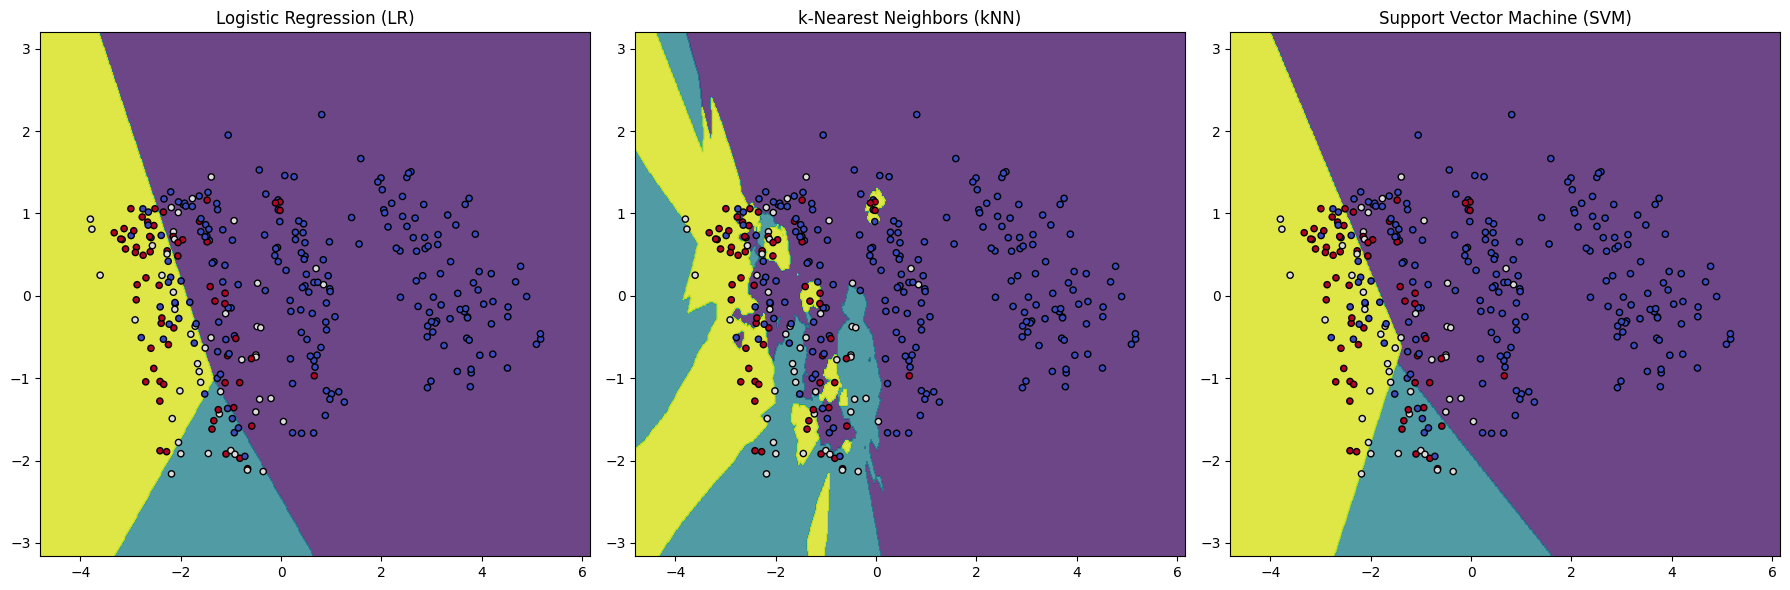

In [26]:
# Step 1: Apply PCA to reduce the data to 2D for visualization
pca = PCA(n_components=2)

# Apply PCA to the scaled training data (X_train_scaled) and testing data (X_test_scaled)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Step 2: Train the models on PCA-reduced data
# Logistic Regression
lr_model_pca = LogisticRegression(max_iter=1000, multi_class='ovr')
lr_model_pca.fit(X_train_pca, y_train)

# k-Nearest Neighbors (kNN)
knn_model_pca = KNeighborsClassifier(n_neighbors=5)
knn_model_pca.fit(X_train_pca, y_train)

# Support Vector Machine (SVM)
svm_model_pca = SVC(kernel='linear', decision_function_shape='ovr')
svm_model_pca.fit(X_train_pca, y_train)

# Step 3: Visualize the decision boundaries
def plot_decision_boundaries(X, y, model, ax, title):
    # Create a mesh grid to plot the decision boundaries
    h = 0.02  # Step size in mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict the class labels for the entire grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and the points
    ax.contourf(xx, yy, Z, alpha=0.8)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=20, cmap=plt.cm.coolwarm)
    ax.set_title(title)
    return scatter

# Step 4: Plot the decision boundaries for each model
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Logistic Regression
p = plot_decision_boundaries(X_train_pca, y_train, lr_model_pca, axes[0], "Logistic Regression (LR)")

# k-Nearest Neighbors (kNN)
plot_decision_boundaries(X_train_pca, y_train, knn_model_pca, axes[1], "k-Nearest Neighbors (kNN)")

# Support Vector Machine (SVM)
plot_decision_boundaries(X_train_pca, y_train, svm_model_pca, axes[2], "Support Vector Machine (SVM)")


plt.tight_layout()
plt.show()

## Decision Boundary Analysis of Multiclass Classifiers

### 1. Logistic Regression (LR)
- **Linearity**: The decision boundaries are clearly **linear**, as expected from a model that fits a linear decision surface for each class.
- **Complexity**: Very **low model complexity** – the boundaries are smooth, globally linear, and easy to interpret.
- **Generalization**: Tends to **generalize well** on linearly separable or moderately noisy data, but might **underfit** in more complex data patterns.
- **Limitation**: Struggles with capturing **nonlinear class distributions** or when class clusters are not linearly separable.

---

### 2. k-Nearest Neighbors (kNN)
- **Linearity**: The decision boundaries are highly **nonlinear**, with **irregular, wiggly shapes** that follow the distribution of the training data very closely.
- **Complexity**: **Very high complexity** – especially in local regions with class overlap. This behavior reflects the **instance-based learning** nature of kNN.
- **Generalization**: While flexible, the boundaries suggest **overfitting**, particularly around dense regions with noise or minority class samples.
- **Limitation**: Poor generalization to new data if the dataset is noisy or has uneven class distributions.

---

### 3. Support Vector Machine (SVM, likely linear kernel)
- **Linearity**: Similar to Logistic Regression, SVM here shows **linear boundaries** between class regions.
- **Complexity**: Low to moderate complexity, with well-defined **maximum-margin hyperplanes** separating classes.
- **Generalization**: Tends to **generalize better than LR** when margins are important, and is **robust to outliers** if margins are well-separated.
- **Limitation**: Like LR, it can **struggle with complex non-linear patterns** unless using non-linear kernels (e.g., RBF, polynomial).

---

### Overall Comparison

| Model                | Linearity         | Complexity        | Overfitting Risk | Generalization Strength |
|---------------------|-------------------|-------------------|------------------|--------------------------|
| **Logistic Regression** | Linear            | Low               | Low              | Moderate (underfits complex data) |
| **kNN**             | Nonlinear (irregular) | High              | High             | Low (overfits)          |
| **SVM**             | Linear (or piecewise) | Low–Moderate     | Low              | High (on margin-separated data) |

---

### Conclusion:
- **Logistic Regression** is best for **simple, linearly separable problems** and offers strong interpretability.
- **kNN** adapts well to complex patterns but can **overfit** and suffers in high-dimensional or noisy data.
- **SVM** strikes a balance – with good generalization and margin optimization – making it a **robust choice** for many real-world problems when data is not highly nonlinear.

> ✅ For generalization and interpretability in moderately complex data: **SVM or Logistic Regression**  
> ⚠️ Avoid using **kNN** without tuning or regularization when class boundaries are noisy or the dataset is imbalanced.
